In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(19)
from onboard.client import OnboardClient
from onboard.client.dataframes import points_df_from_streaming_timeseries
from onboard.client.models import PointSelector, TimeseriesQuery, PointData
from datetime import datetime, timezone, timedelta
from typing import List
import pytz
from onboard.client import RtemClient
import missingno as msno
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans

In [2]:
building_api_key = 'API_KEY'
general_api_key='API_KEY'
#rtem_api_key='API_KEY'

In [3]:
#general_client = RtemClient(api_key=general_api_key)
#building_client = RtemClient(api_key=building_api_key)
Building_client=RtemClient(api_key=building_api_key)
general_client=RtemClient(api_key=general_api_key)

In [4]:
Buildings =  pd.json_normalize(Building_client.get_all_buildings())


In [5]:
print(Buildings.shape)
Buildings.head()

(229, 26)


id  org_id    name address     sq_ft image_src bms_manufacturer  \
0  441       5   88737    None  551143.0      None             None   
1  140       5   83483    None   21869.0      None             None   
2  191       5   94414    None  198057.0      None             None   
3  231       5   89496    None       NaN      None             None   
4  248       5  116742    None  127000.0      None             None   

  bms_product_name bms_version          timezone  ... info.sunend  \
0             None        None  America/New_York  ...               
1             None        None  America/New_York  ...               
2             None        None  America/New_York  ...       23:00   
3             None        None  America/New_York  ...               
4             None        None  America/New_York  ...               

   info.geoCity  info.geoState info.m2fstart info.satstart info.sunstart  \
0         Bronx             NY                                             
1      New York             NY                                             
2        Victor             NY         07:30         07:30         07:30   
3      New York             NY                                             
4      New York             NY                                             

  info.yearBuilt info.geoCountry info.weatherRef  info.customerType  
0                             US                        Multifamily  
1                             US                  Commercial Office  
2                             US                  Commercial Retail  
3                             US                                     
4                             US                        Multifamily  

[5 rows x 26 columns]

In [6]:
remove_list=['address','image_src','bms_version','bms_manufacturer','status','timezone','bms_product_name','info.sunend','info.geoState','info.geoCountry','org_id']

In [7]:
new_Buildings=Buildings.drop(remove_list,axis='columns')

In [8]:

print(new_Buildings.shape)
new_Buildings.head()

(229, 15)


id    name     sq_ft  equip_count  point_count info.floors info.m2fend  \
0  441   88737  551143.0           20         1293                           
1  140   83483   21869.0           13          354                           
2  191   94414  198057.0            7           19                   23:00   
3  231   89496       NaN            4           51                           
4  248  116742  127000.0            7           34                           

  info.satend info.geoCity info.m2fstart info.satstart info.sunstart  \
0                    Bronx                                             
1                 New York                                             
2       23:00       Victor         07:30         07:30         07:30   
3                 New York                                             
4                 New York                                             

  info.yearBuilt info.weatherRef  info.customerType  
0                                       Multifamily  
1                                 Commercial Office  
2                                 Commercial Retail  
3                                                    
4                                       Multifamily

<AxesSubplot:>

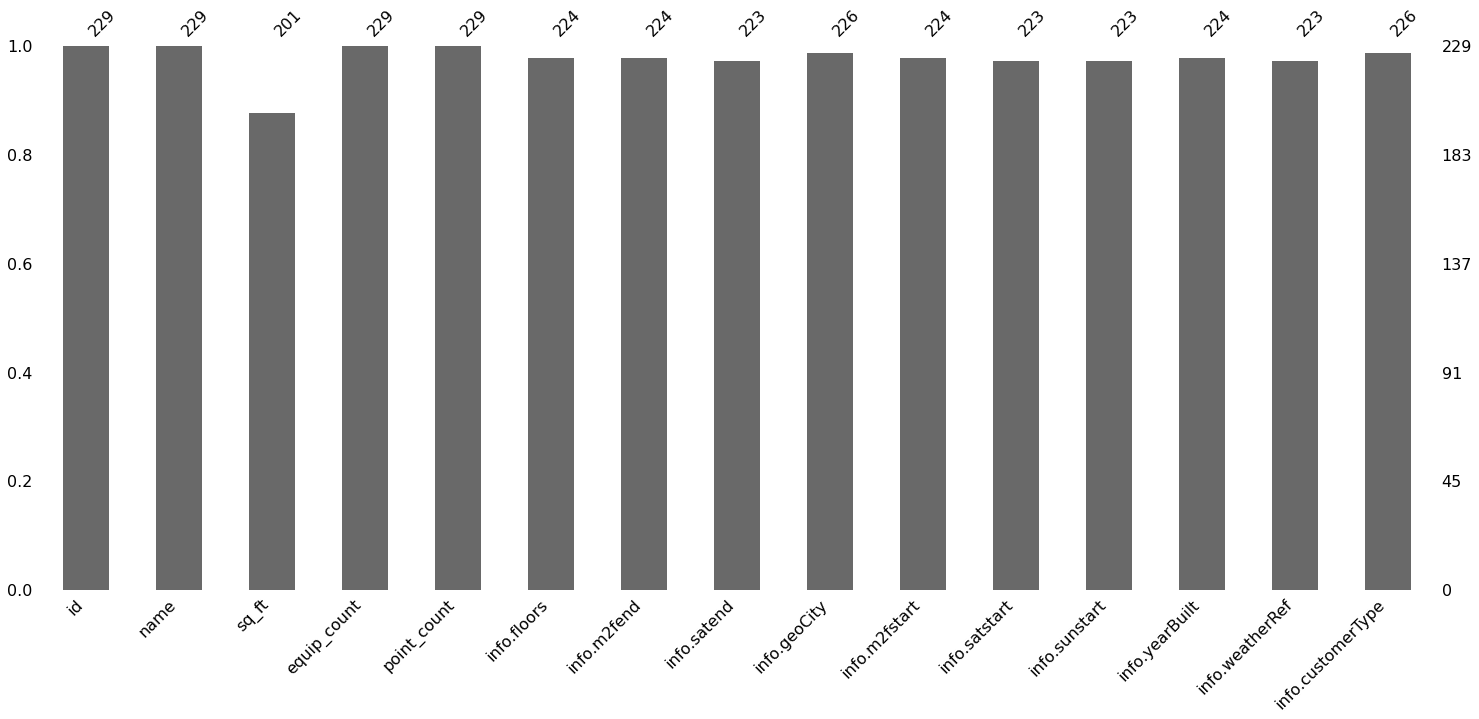

In [9]:
msno.bar(new_Buildings)

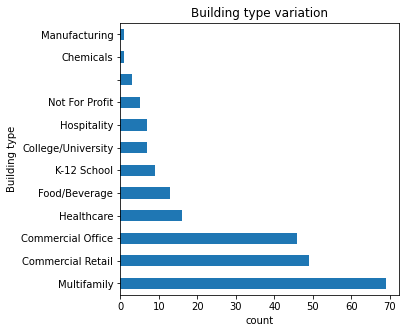

<Figure size 1200x800 with 0 Axes>

In [12]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
figure(figsize=(15,10), dpi=80)
Buildings['info.customerType'].value_counts().plot(kind='barh',ax=ax1,figsize=(5,5))
ax1.set_xlabel('count')
ax1.set_ylabel('Building type')
ax1.set_title('Building type variation')
plt.tight_layout()


<Figure size 1200x400 with 0 Axes>

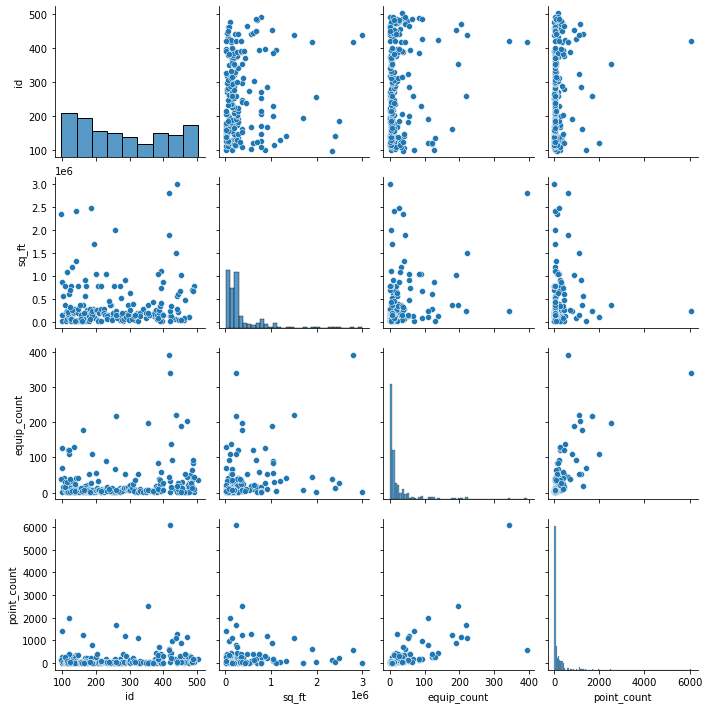

In [43]:
figure(figsize=(15,5), dpi=80)
sns.pairplot(new_Buildings)

In [44]:
new_Buildings.head()


id    name     sq_ft  equip_count  point_count info.org info.floors  \
0  441   88737  551143.0           20         1293                        
1  140   83483   21869.0           13          354                        
2  191   94414  198057.0            7           19                        
3  231   89496       NaN            4           51                        
4  248  116742  127000.0            7           34                        

  info.m2fend info.satend info.geoCity info.m2fstart info.satstart  \
0                                Bronx                               
1                             New York                               
2       23:00       23:00       Victor         07:30         07:30   
3                             New York                               
4                             New York                               

  info.sunstart info.yearBuilt info.weatherRef  info.customerType  
0                                                     Multifamily  
1                                               Commercial Office  
2         07:30                                 Commercial Retail  
3                                                                  
4                                                     Multifamily

Text(0.5, 1.0, 'AVERAGE(area vs building)')

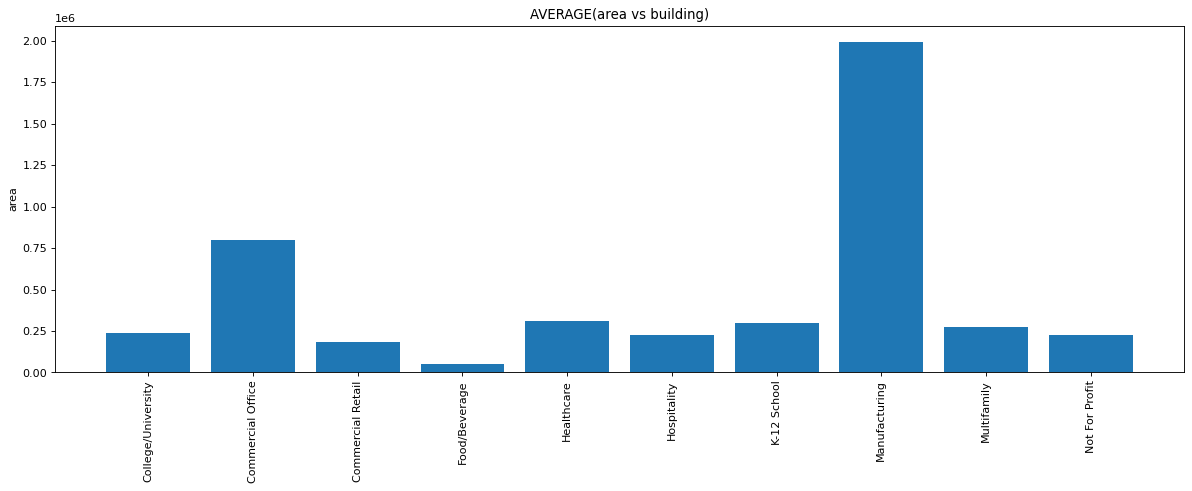

In [45]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.customerType']).mean().index,new_Buildings.groupby(['info.customerType']).mean()['sq_ft'])
plt.ylabel('area')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(area vs building)')

Text(0.5, 1.0, 'AVERAGE(area vs location)')

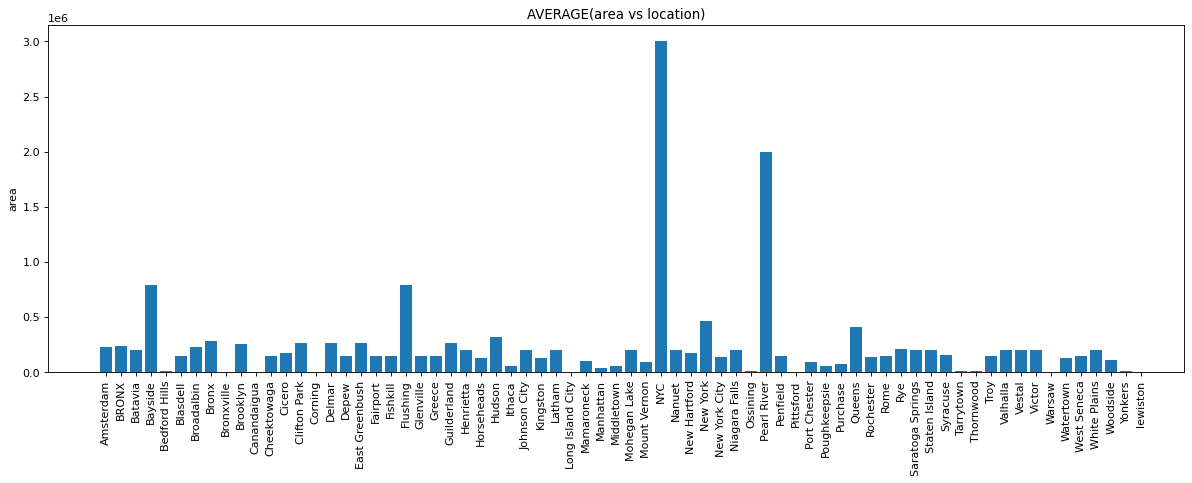

In [46]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.geoCity']).mean().index,new_Buildings.groupby(['info.geoCity']).mean()['sq_ft'])
plt.ylabel('area')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(area vs location)')

Text(0.5, 1.0, 'AVERAGE(equip_count vs building)')

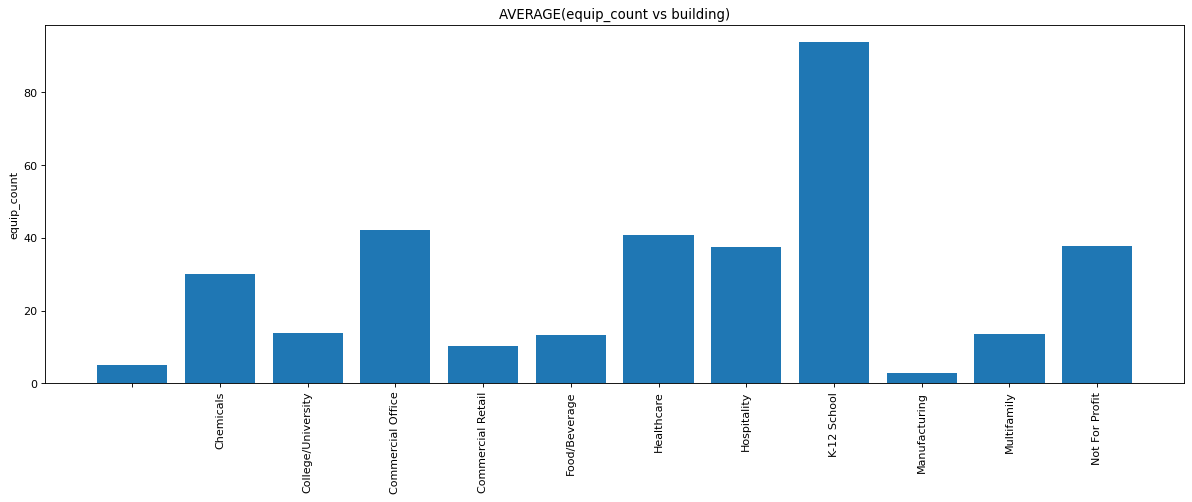

In [47]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.customerType']).mean().index,new_Buildings.groupby(['info.customerType']).mean()['equip_count'])
plt.ylabel('equip_count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(equip_count vs building)')

Text(0.5, 1.0, 'AVERAGE(equip_count vs location)')

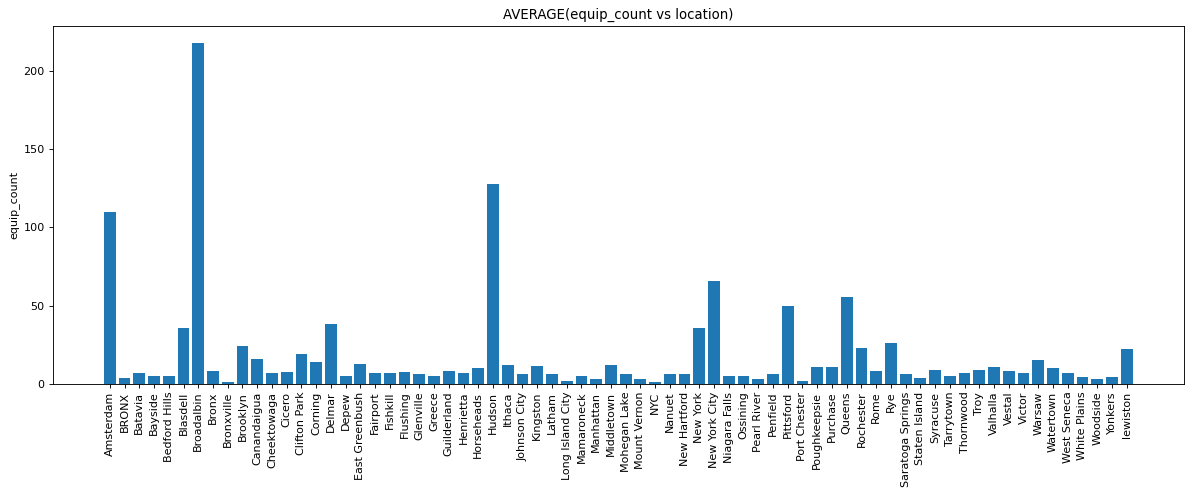

In [48]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.geoCity']).mean().index,new_Buildings.groupby(['info.geoCity']).mean()['equip_count'])
plt.ylabel('equip_count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(equip_count vs location)')

Text(0.5, 1.0, 'AVERAGE(point_count vs building)')

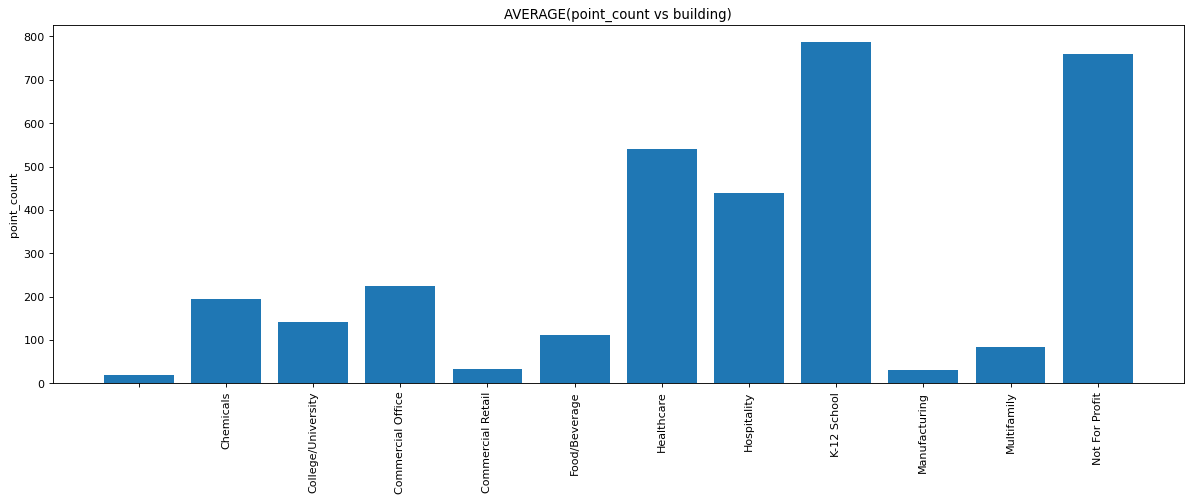

In [49]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.customerType']).mean().index,new_Buildings.groupby(['info.customerType']).mean()['point_count'])
plt.ylabel('point_count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(point_count vs building)')

Text(0.5, 1.0, 'AVERAGE(point_count vs location)')

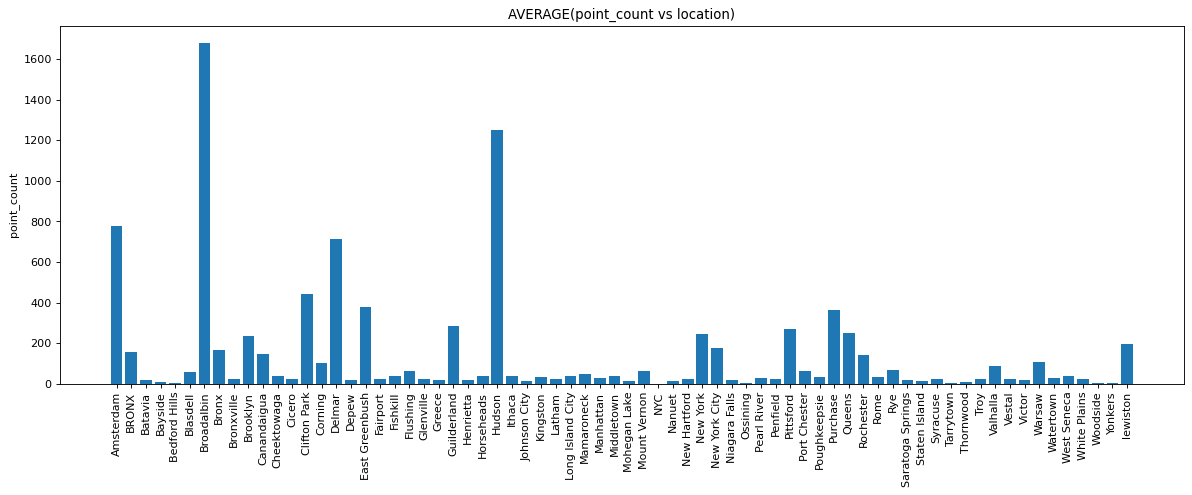

In [50]:
figure(figsize=(15,5), dpi=80)
plt.bar(new_Buildings.groupby(['info.geoCity']).mean().index,new_Buildings.groupby(['info.geoCity']).mean()['point_count'])
plt.ylabel('point_count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('AVERAGE(point_count vs location)')

In [51]:
new_Buildings.head()

id    name     sq_ft  equip_count  point_count info.org info.floors  \
0  441   88737  551143.0           20         1293                        
1  140   83483   21869.0           13          354                        
2  191   94414  198057.0            7           19                        
3  231   89496       NaN            4           51                        
4  248  116742  127000.0            7           34                        

  info.m2fend info.satend info.geoCity info.m2fstart info.satstart  \
0                                Bronx                               
1                             New York                               
2       23:00       23:00       Victor         07:30         07:30   
3                             New York                               
4                             New York                               

  info.sunstart info.yearBuilt info.weatherRef  info.customerType  
0                                                     Multifamily  
1                                               Commercial Office  
2         07:30                                 Commercial Retail  
3                                                                  
4                                                     Multifamily

In [52]:
Equipment = pd.json_normalize(general_client.get_equipment_types())
print(Equipment.shape)


(39, 9)


Text(0.5, 1.0, 'count of flow order')

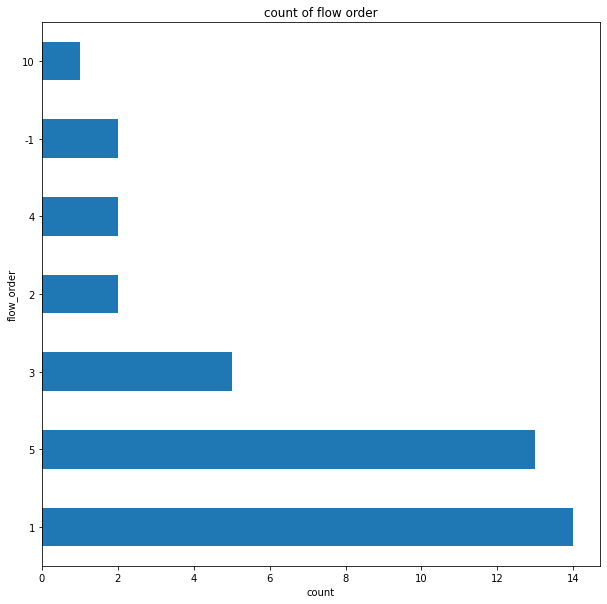

In [53]:
Equipment['flow_order'].value_counts().plot(kind='barh',figsize=(10,10))
plt.xlabel('count')
plt.ylabel('flow_order')
plt.title('count of flow order')

In [54]:
Equipment.head(2)

id tag_name          name_long name_abbr  active  flow_order  \
0  12      ahu  Air Handling Unit       AHU    True           2   
1  19   boiler             Boiler       BLR    True           1   

      critical_point_types                                          sub_types  \
0  [79, 85, 103, 159, 160]  [{'id': 1, 'equipment_type_id': 12, 'tag_name'...   
1  [88, 131, 92, 167, 121]  [{'id': 4, 'equipment_type_id': 19, 'tag_name'...   

             tags  
0     [hvac, ahu]  
1  [hvac, boiler]

In [55]:
empty_data_for_CPT=0
for i in Equipment['critical_point_types']:
    if len(i)==0:
        empty_data_for_CPT+=1
        
print('empty data points for critical point types is',empty_data_for_CPT)

empty data points for critical point types is 21


In [56]:
empty_data_for_sub_types=0
for i in Equipment['sub_types']:
    if len(i)==0:
        empty_data_for_sub_types+=1
        
print('empty data points for sub_ types is',empty_data_for_sub_types)

empty data points for sub_ types is 24


In [57]:
empty_data_for_tags=0
for i in Equipment['tags']:
    if len(i)==0:
        empty_data_for_tags+=1
        
print('empty data points for tags is',empty_data_for_tags)

empty data points for tags is 11


<AxesSubplot:>

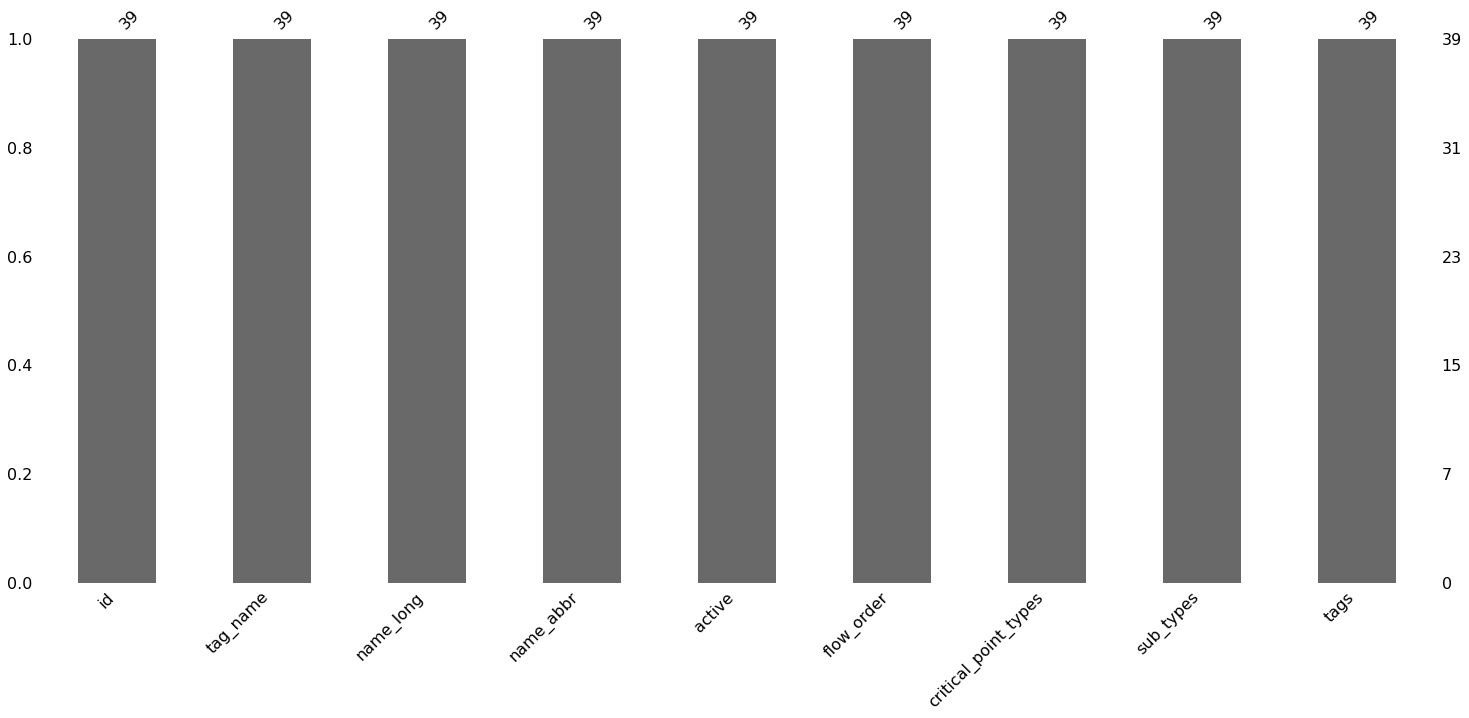

In [58]:
msno.bar(Equipment)

In [59]:
Equipment.head(2)

id tag_name          name_long name_abbr  active  flow_order  \
0  12      ahu  Air Handling Unit       AHU    True           2   
1  19   boiler             Boiler       BLR    True           1   

      critical_point_types                                          sub_types  \
0  [79, 85, 103, 159, 160]  [{'id': 1, 'equipment_type_id': 12, 'tag_name'...   
1  [88, 131, 92, 167, 121]  [{'id': 4, 'equipment_type_id': 19, 'tag_name'...   

             tags  
0     [hvac, ahu]  
1  [hvac, boiler]

In [60]:
point_type = pd.json_normalize(general_client.get_all_point_types())
point_type.shape

(647, 7)

In [61]:
point_type.head(2)

id                    tag_name  active  measurement_id  \
0  124   Occupied Heating Setpoint    True               1   
1  118  Outside Air Carbon Dioxide    True               6   

              tag_set_ids                                 tags default_unit_id  
0  [15, 2, 4, 62, 51, 55]  [air, sp, temp, zone, heating, occ]            None  
1          [15, 8, 1, 24]          [air, co2, sensor, outside]            None

In [62]:
empty_data_for_point_tags=0
for i in point_type['tags']:
    if len(i)==0:
        empty_data_for_point_tags+=1
        
print('empty_data_for_point_tags is',empty_data_for_point_tags)

empty_data_for_point_tags is 3


In [63]:
empty_data_for_point_tag_set_ids=0
for i in point_type['tag_set_ids']:
    if len(i)==0:
        empty_data_for_point_tag_set_ids+=1
        
print('empty_data_for_point_tag_set_ids is',empty_data_for_point_tag_set_ids)

empty_data_for_point_tag_set_ids is 3


<AxesSubplot:>

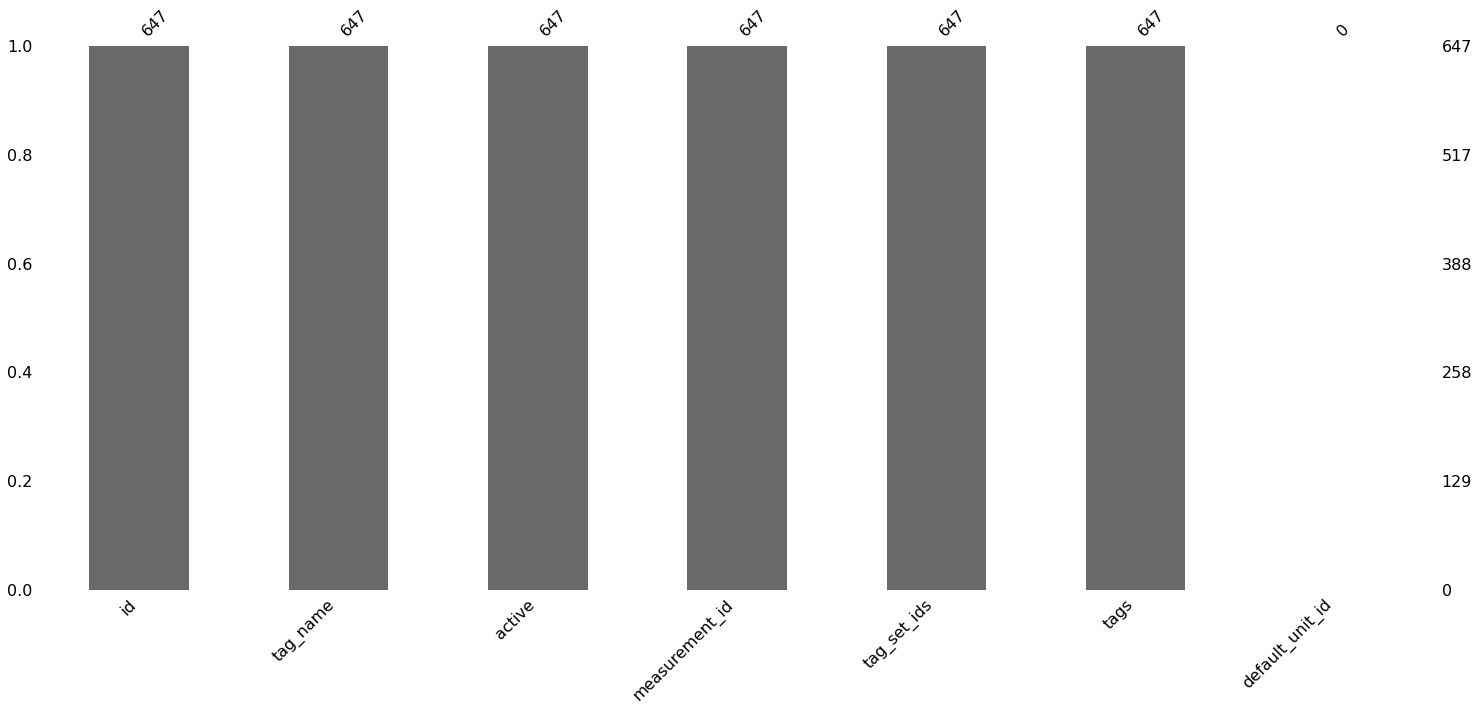

In [64]:
msno.bar(point_type)

In [65]:
print(len(point_type['tag_name'].unique()))

647


In [66]:
measurement_types = pd.json_normalize(general_client.get_all_measurements())
print(measurement_types.shape)

(41, 6)


In [67]:
measurement_types.head(2)

id           name  default_unit_id  units_convertible  \
0  10      Occupancy              NaN              False   
1  57  Dimensionless              NaN              False   

                                               units qudt_type  
0  [{'id': 31, 'name_long': 'Ordinal Value', 'nam...      None  
1  [{'id': 73, 'name_long': 'Number', 'name_abbr'...      None

In [68]:
empty_data_for_units=0
for i in measurement_types['units']:
    if len(i)==0:
        empty_data_for_units+=1
        
print('empty_data_for_units is',empty_data_for_units)

empty_data_for_units is 1


<AxesSubplot:>

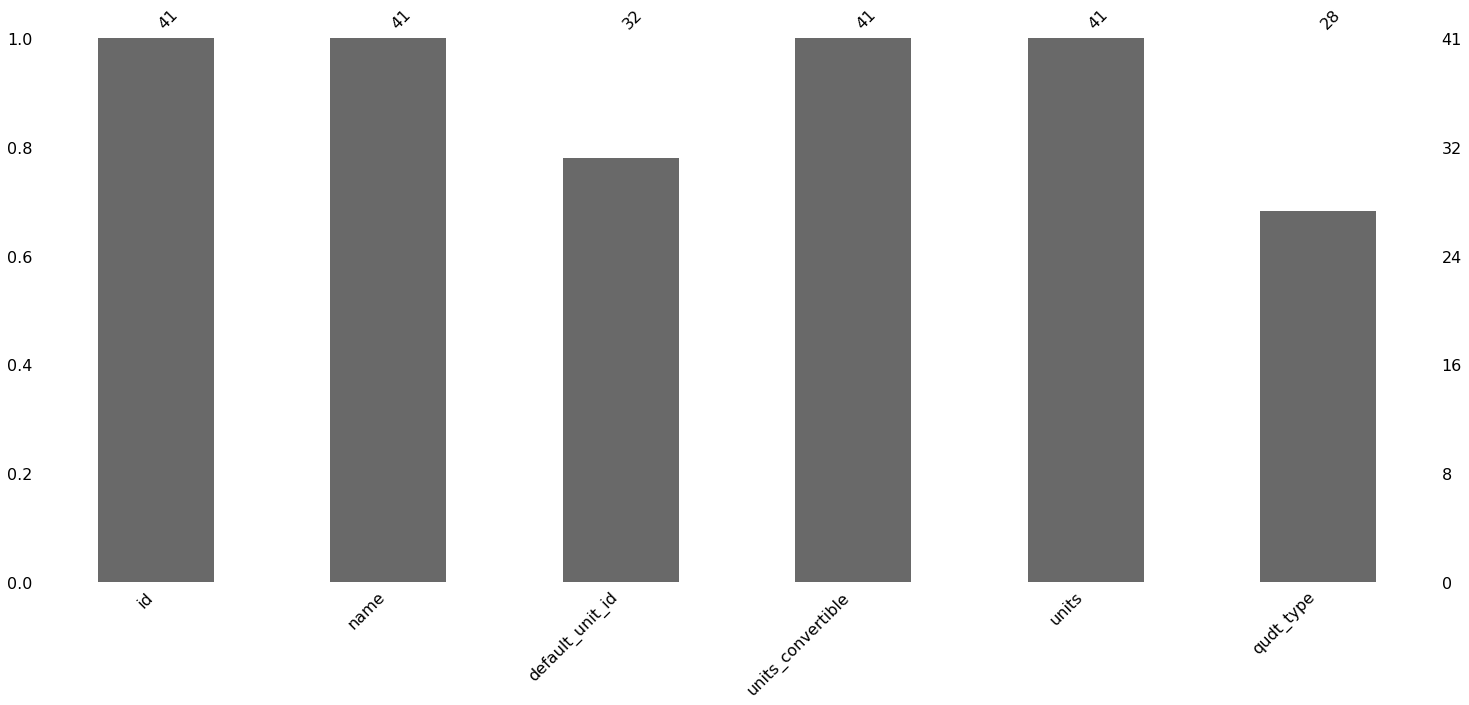

In [69]:
msno.bar(measurement_types)

Text(0.5, 1.0, 'count of units_convertible')

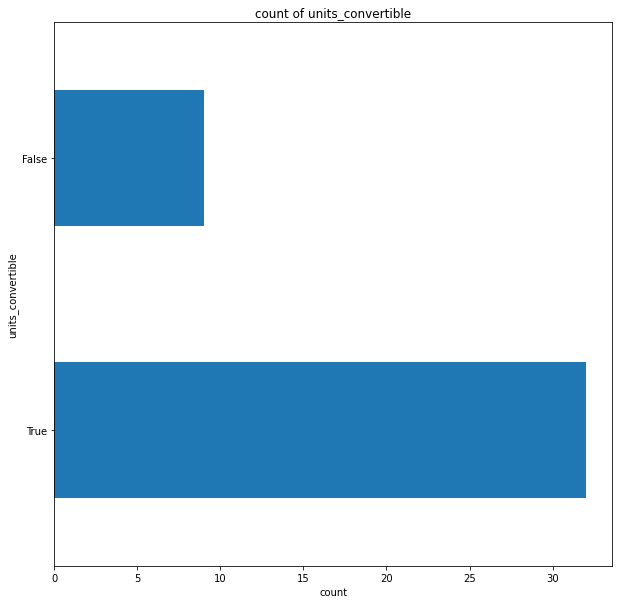

In [70]:
measurement_types['units_convertible'].value_counts().plot(kind='barh',figsize=(10,10))
plt.xlabel('count')
plt.ylabel('units_convertible')
plt.title('count of units_convertible')

Text(0.5, 1.0, 'count of qudt_type')

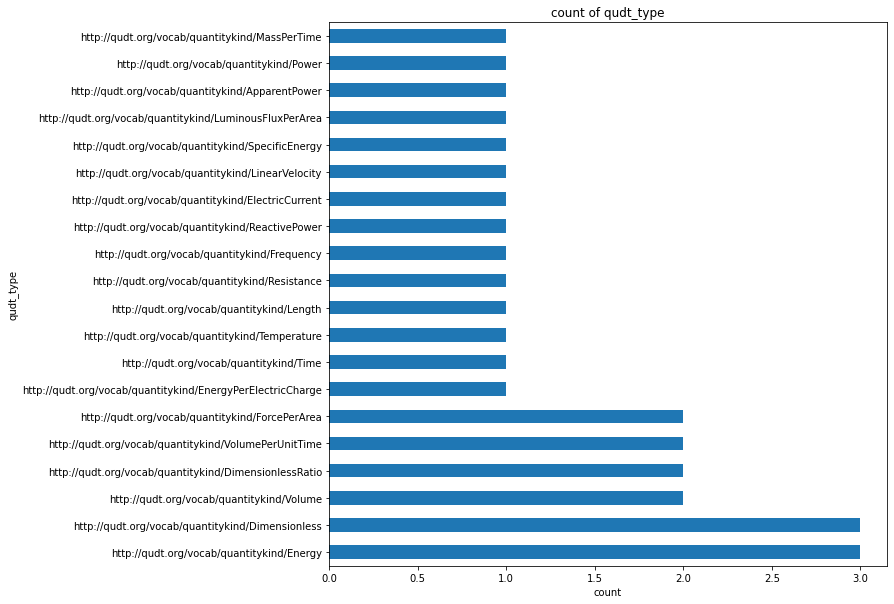

In [71]:
measurement_types['qudt_type'].value_counts().plot(kind='barh',figsize=(10,10))
plt.xlabel('count')
plt.ylabel('qudt_type')
plt.title('count of qudt_type')